### Texas Employee Salary Prediction 

### Introduction 

In [3]:
# The Texas state government employs thousands of individuals across more than 100 agencies, each with different roles, responsibilities, and salary structures. Managing such a vast payroll system requires insights into employee compensation trends, potential disparities, and forecasting capabilities.
# This project aims to analyze and model the salary data of Texas state employees. The dataset includes detailed information such as job titles, agencies, pay rates, demographics, and employment history.

In [4]:
# Through this project, we aim to:
# Analyze salary trends and patterns across various dimensions.
# Detect outliers and wage disparities.
# Monitor how compensation has changed over time.
# Build predictive models to estimate employee salaries.
# This work will support the Texas state government in making data-driven decisions regarding compensation planning and policy enforcement.

**Business Problem:** The Texas state government needs to manage and forecast salaries for thousands of employees across various agencies, facing challenges in identifying pay disparities, tracking salary trends, and predicting future payroll costs.
**Goal:**To analyze employee salary data to detect outliers, understand wage gaps, monitor compensation trends, and build a predictive model for accurate payroll estimation.

In [6]:
# Business Objectives: The project aims to:
# Analyze salary data to understand distributions, identify outliers, and explore trends across departments, roles, and demographics.
# Identify wage disparities between managers and employees across various departments.
# Monitor compensation trends, examining changes in salaries and total compensation over time.

In [7]:
# Predict Payroll
# Build a machine learning model to predict employee salary based on available features such as role, agency, working hours, and demographics.
# Support Data-Driven Decisions
# Provide insights and tools that help the Texas state government plan budgets, promote pay equity, and improve salary management.

In [8]:
# Import Required Libraries 1:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
# Data Importing
data=pd.read_csv('salary.csv')
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [10]:
# Basic Checks
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [11]:
data.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [13]:
data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGENCY,149481.0,545.736288,139.057691,101.0,529.00,530.00,696.00,9.300000e+02
HRLY RATE,149481.0,0.346488,4.211485,0.0,0.00,0.00,0.00,1.177885e+02
HRS PER WK,149481.0,39.714918,2.323855,1.0,40.00,40.00,40.00,7.000000e+01
MONTHLY,149481.0,4226.184248,2093.111691,50.0,3019.84,3720.17,4865.81,4.612500e+04
ANNUAL,149481.0,50714.210973,25117.340292,600.0,36238.08,44642.04,58389.72,5.535000e+05
STATE NUMBER,149481.0,565193.023521,478621.220542,1.0,113334.00,346373.00,1100500.00,1.271604e+06
multiple_full_time_jobs,14.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.000000e+00
summed_annual_salary,16.0,74303.955000,51925.944282,18000.0,32962.50,48063.30,123751.77,1.713834e+05


In [15]:
data.describe(include='O').T

,count,unique,top,freq
AGENCY NAME,149481,113,HEALTH AND HUMAN SERVICES COMMISSION ...,36667
LAST NAME,149481,38675,SMITH,1243
FIRST NAME,149481,23559,MICHAEL,1843
MI,149481,27,,38408
CLASS CODE,149481,1481,4504,9267
CLASS TITLE,149481,1422,CORREC OFFICER IV ...,9267
ETHNICITY,149481,6,WHITE,67142
GENDER,149481,2,FEMALE,85328
STATUS,149481,11,CRF - CLASSIFIED REGULAR FULL-TIME,142502
EMPLOY DATE,149481,6295,09/01/17,12359


In [16]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [17]:
data.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

In [18]:
data.shape

(149481, 21)

In [19]:
data.duplicated().sum()

0

In [20]:
#unique value per column
print("\nUnique value in each column: ")
print(data.nunique())


Unique value in each column: 
AGENCY                        113
AGENCY NAME                   113
LAST NAME                   38675
FIRST NAME                  23559
MI                             27
CLASS CODE                   1481
CLASS TITLE                  1422
ETHNICITY                       6
GENDER                          2
STATUS                         11
EMPLOY DATE                  6295
HRLY RATE                     206
HRS PER WK                     58
MONTHLY                     40552
ANNUAL                      40554
STATE NUMBER               149465
duplicated                      1
multiple_full_time_jobs         1
combined_multiple_jobs          1
summed_annual_salary           15
hide_from_search                1
dtype: int64


In [21]:
# check for negative or zeron salary
print("\nRecords with zero or negative annual Salary:")
print(data[data['ANNUAL'] <= 0])


Records with zero or negative annual Salary:
Empty DataFrame
Columns: [AGENCY, AGENCY NAME, LAST NAME, FIRST NAME, MI, CLASS CODE, CLASS TITLE, ETHNICITY, GENDER, STATUS, EMPLOY DATE, HRLY RATE, HRS PER WK, MONTHLY, ANNUAL, STATE NUMBER, duplicated, multiple_full_time_jobs, combined_multiple_jobs, summed_annual_salary, hide_from_search]
Index: []

[0 rows x 21 columns]


In [22]:
# check range of employment dates
if 'EMPLOY DATE' in data.columns:
  data['EMPLOY DATE']=pd.to_datetime(data["EMPLOY DATE"],errors="coerce")
  print("\nEmployement data range:")
  print(f"From{data['EMPLOY DATE'].min().date()} to{data['EMPLOY DATE'].max().date()}")


Employement data range:
From1975-09-01 to2073-09-10


### Data Prepeocessing

In [24]:
# Drop Unnecessary Columns
data.drop(columns=[
    "duplicated",
    "multiple_full_time_jobs",
    "combined_multiple_jobs",
    "summed_annual_salary",
    "hide_from_search"
],inplace=True)

In [25]:
# Standardize Column Names

In [26]:
data.columns=data.columns.str.strip().str.lower().str.replace(' ','_')

In [27]:
data.columns

Index(['agency', 'agency_name', 'last_name', 'first_name', 'mi', 'class_code',
       'class_title', 'ethnicity', 'gender', 'status', 'employ_date',
       'hrly_rate', 'hrs_per_wk', 'monthly', 'annual', 'state_number'],
      dtype='object')

In [28]:
# Convert Date Columns

In [29]:
data['employ_date']=pd.to_datetime(data['employ_date'],errors='coerce')

### Convert Salary Columns to Numeric

In [31]:
data['annual']=pd.to_numeric(data['annual'],errors='coerce')

In [32]:
data['monthly']=pd.to_numeric(data['monthly'],errors='coerce')

In [33]:
data['hrly_rate']=pd.to_numeric(data['hrly_rate'],errors='coerce')

In [34]:
data['hrs_per_wk']=pd.to_numeric(data['hrs_per_wk'],errors='coerce')

### Handle Duplicates

In [36]:
data.drop_duplicates(inplace=True)

### Handle Zero or Negative Salary

In [38]:
data=data[data['annual'] >0]

### Encoding Catrgorical Variables

In [40]:
data=pd.get_dummies(data,columns=['ethnicity','status'],drop_first=True)

In [41]:
data

,agency,agency_name,last_name,first_name,mi,class_code,class_title,gender,employ_date,hrly_rate,...,status_CRP - CLASSIFIED REGULAR PART-TIME,status_CTF - CLASSIFIED TEMPORARY FULL-TIME,status_CTP - CLASSIFIED TEMPORARY FULL-TIME,status_CTP - CLASSIFIED TEMPORARY PART-TIME,status_ERF - EXEMPT REGULAR FULL-TIME,status_ERP - EXEMPT REGULAR PART-TIME,status_URF - UNCLASSIFIED REGULAR FULL-TIME,status_URP - UNCLASSIFIED REGULAR PART-TIME,status_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,status_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",MALE,1988-02-18,75.96150,...,False,False,False,False,False,False,False,True,False,False
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,MALE,2015-02-01,81.04454,...,False,False,False,True,False,False,False,False,False,False
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",MALE,2020-02-01,75.96150,...,False,False,False,False,False,False,False,True,False,False
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,MALE,2018-09-01,81.04453,...,False,False,False,True,False,False,False,False,False,False
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,FEMALE,2020-06-29,0.00000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,MALE,2017-10-30,0.00000,...,False,False,False,False,False,False,False,False,False,False
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,FEMALE,2015-07-13,0.00000,...,False,False,False,False,False,False,False,False,False,False
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,MALE,2012-10-15,12.93000,...,True,False,False,False,False,False,False,False,False,False
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,MALE,1989-09-22,0.00000,...,False,False,False,False,False,False,False,False,False,False


### Exploratory Data Analysis

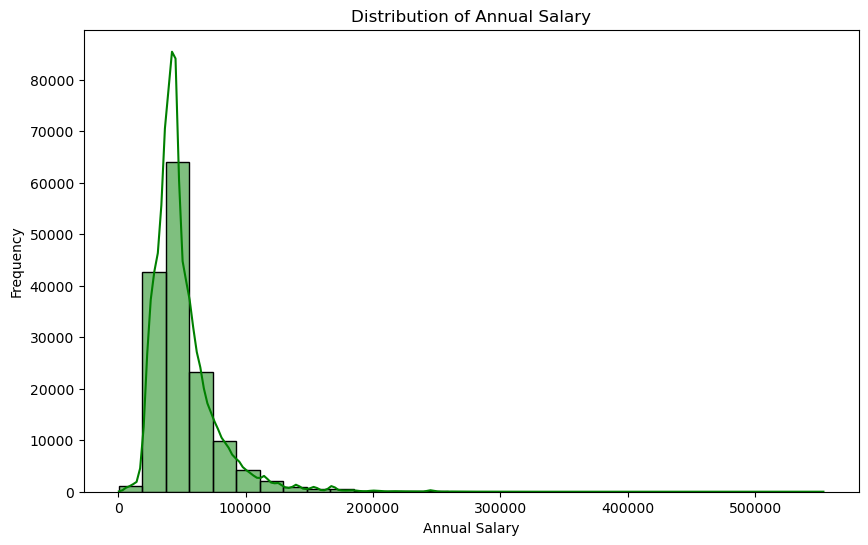

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(data['annual'],bins=30,kde=True,color='green')
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()

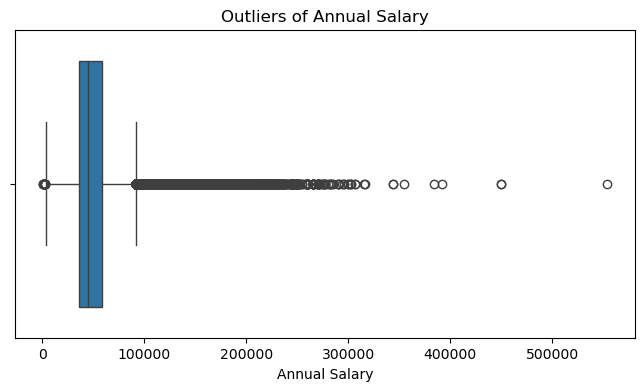

In [44]:
# Boxplot to Detect the Outliers in Salary
plt.figure(figsize=(8,4))
sns.boxplot(x=data['annual'])
plt.title('Outliers of Annual Salary')
plt.xlabel('Annual Salary')
plt.show()

### Salary By Gender

In [46]:
data.column=data.columns.str.strip()

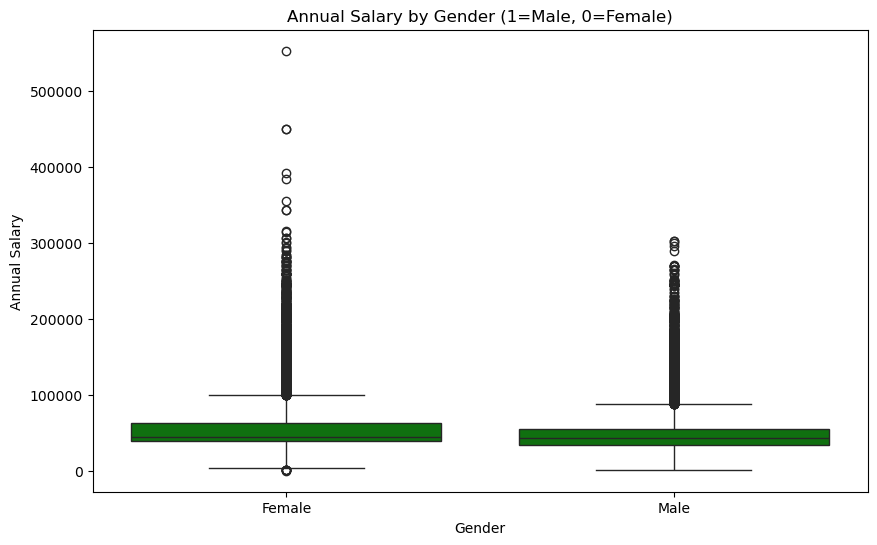

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='annual', data=data,color='green')
plt.title('Annual Salary by Gender (1=Male, 0=Female)')
plt.xlabel('Gender')
plt.ylabel('Annual Salary')
plt.xticks([0, 1], ['Female', 'Male'])  # Optional: Customize x-tick labels for clarity
plt.show()

### Salary by Ethnicity

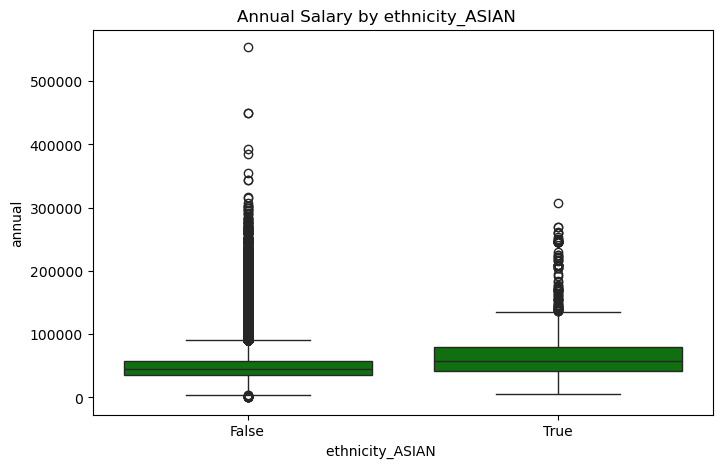

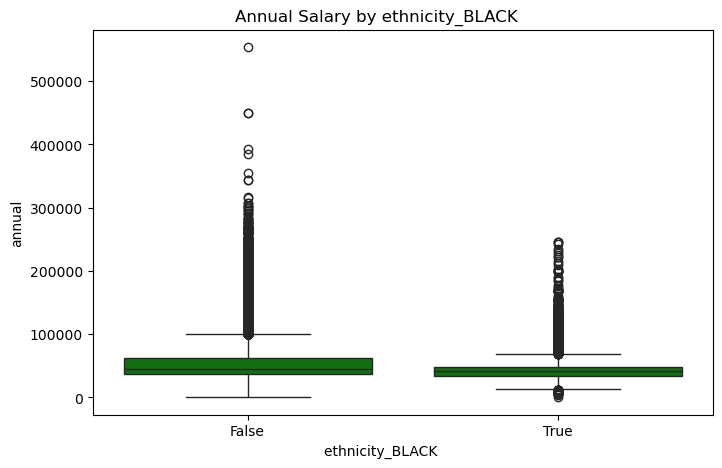

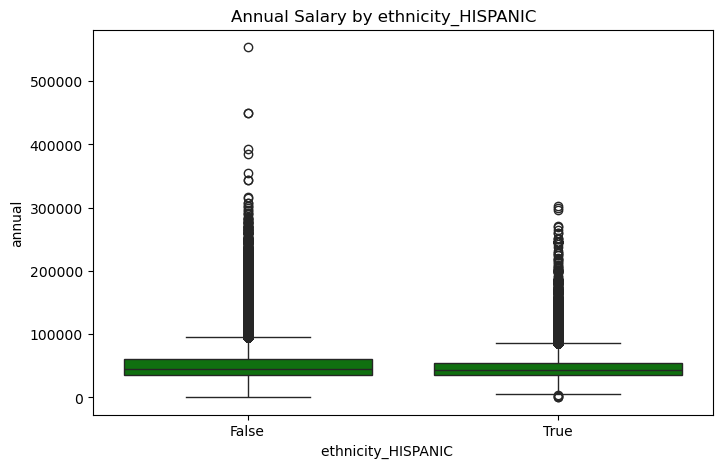

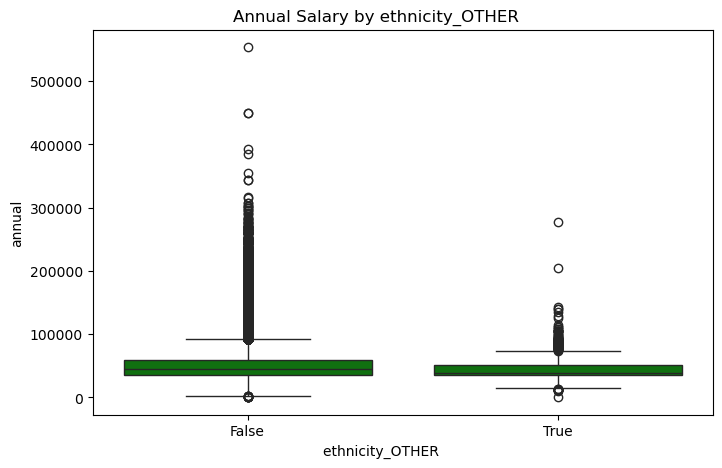

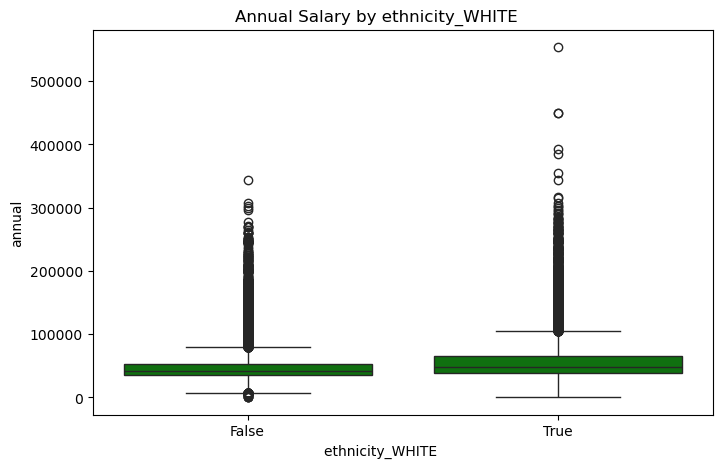

In [49]:
ethnicity_cols = [col for col in data.columns if col.startswith('ethnicity_')]
for col in ethnicity_cols:
  plt.figure(figsize=(8,5))
  sns.boxplot(x=col,y='annual',data=data,color='green')
  plt.title(f'Annual Salary by {col}')
  plt.show()

### Average Salary by Department (TOP10)

In [51]:
top_agenecies = data['agency'].value_counts().nlargest(10).index
data_top_agencies = data[data['agency'].isin(top_agenecies)]

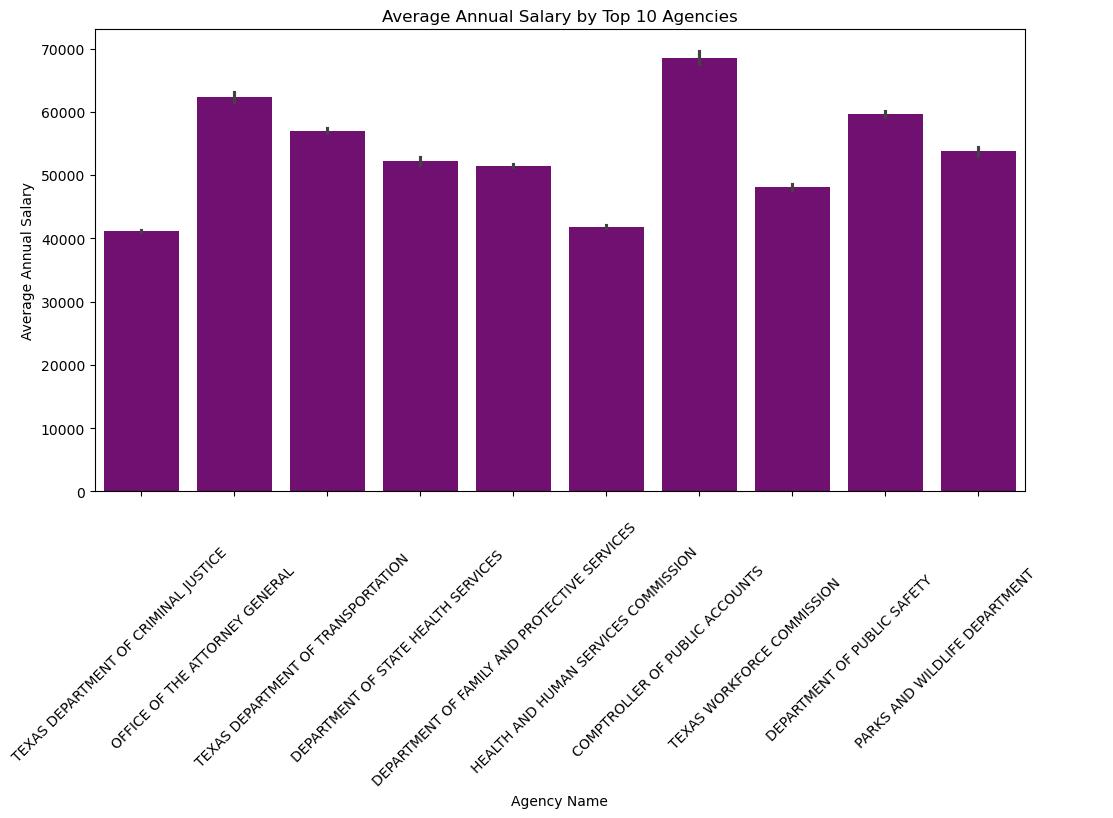

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data_top_agencies,x='agency_name', y='annual',color='purple')
plt.xticks(rotation=45)
plt.title('Average Annual Salary by Top 10 Agencies')
plt.xlabel('Agency Name')
plt.ylabel('Average Annual Salary')
plt.show()

### Salary vs Year Of Services

In [54]:
#convert "employ_data" into "datetime"
data['employ_date']=pd.to_datetime(data['employ_date'], errors= "coerce")

In [55]:
# calculate year of service using todays date
today=datetime.today()
data['year_of_service']=(today-data['employ_date']).dt.days//365

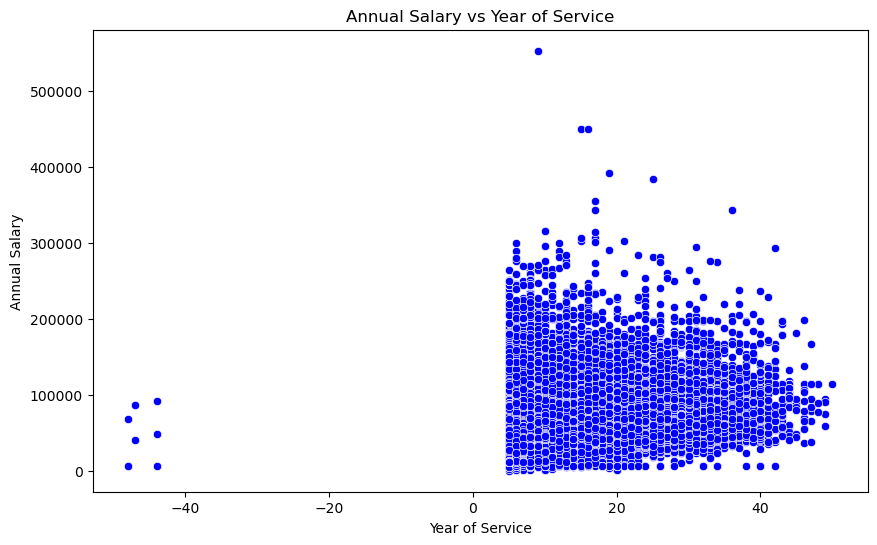

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='year_of_service',y='annual',color='blue')
plt.title('Annual Salary vs Year of Service')
plt.xlabel('Year of Service')
plt.ylabel('Annual Salary')
plt.show()

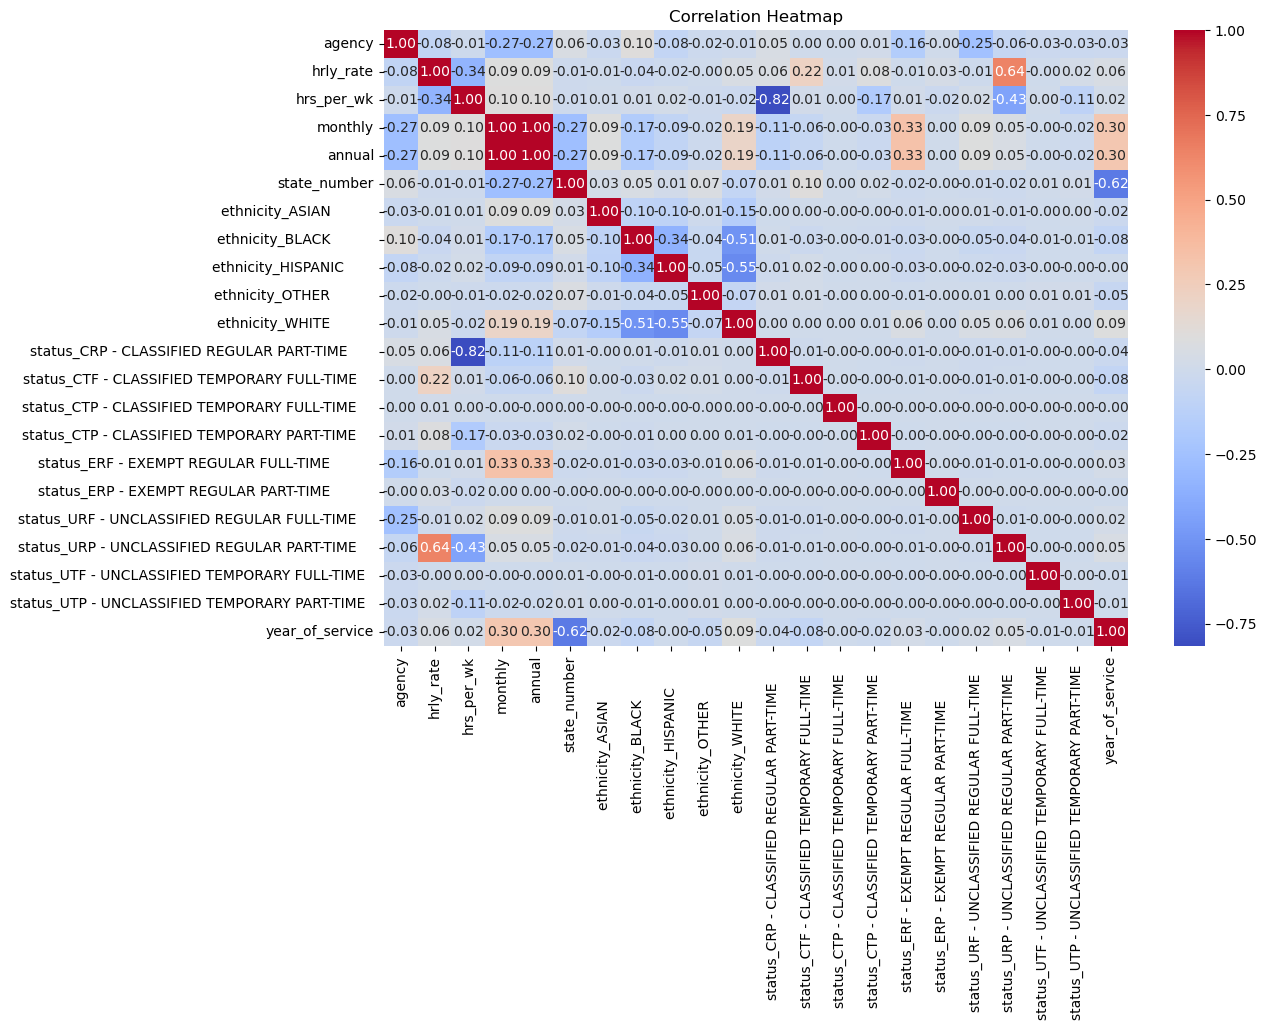

In [57]:
# correlation heatmap for numerical feature
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Salary by job Title(Top 10 most Common job)

In [59]:
top_jobs=data['class_title'].value_counts().nlargest(10).index
data_top_jobs=data[data['class_title'].isin(top_jobs)]

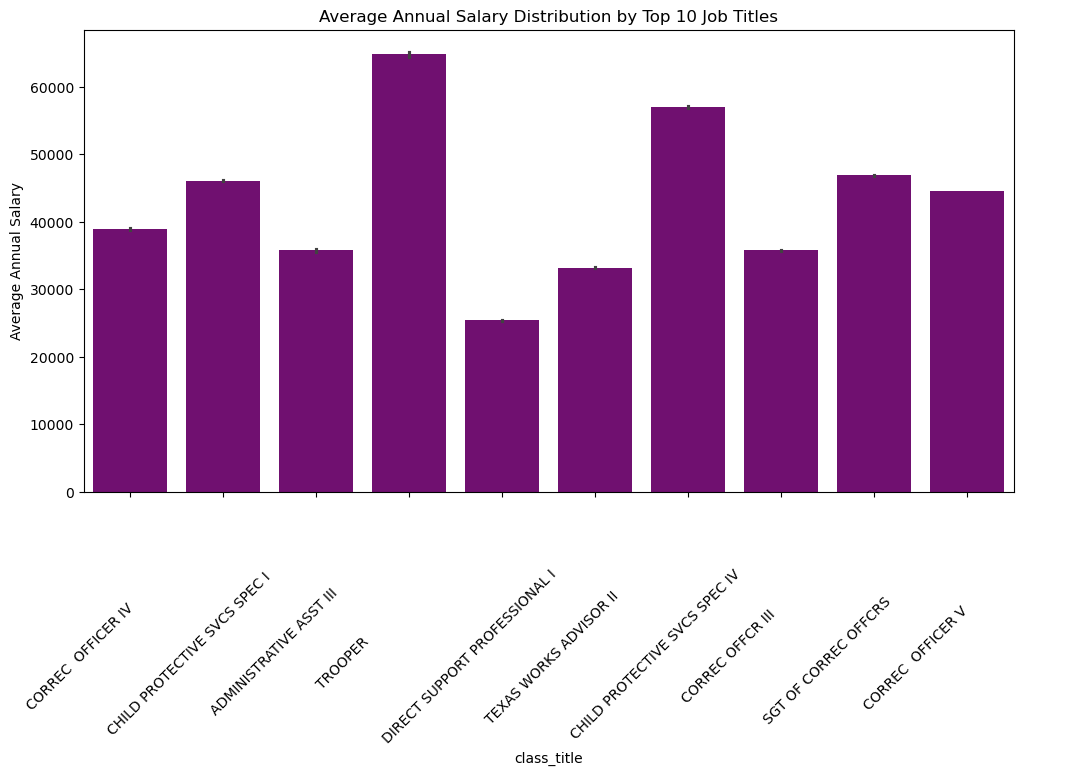

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(data=data_top_jobs,x='class_title',y='annual',color='purple')
plt.xticks(rotation=45)
plt.title('Average Annual Salary Distribution by Top 10 Job Titles')
plt.xlabel
plt.ylabel('Average Annual Salary')
plt.show()

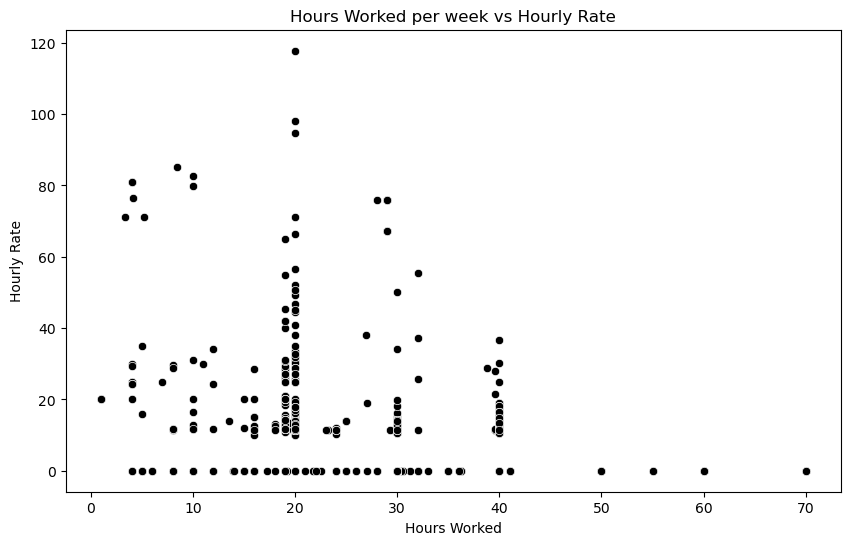

In [61]:
#Hours Worked vs Hourly Rate
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='hrs_per_wk',y='hrly_rate',color='black')
plt.title('Hours Worked per week vs Hourly Rate')
plt.xlabel('Hours Worked')
plt.ylabel('Hourly Rate')
plt.show()

### Count Of Employee By Employmnent Status

In [63]:
status_cols = [col for col in data.columns if col.startswith('status_')]
status_counts = data[status_cols].sum().sort_values(ascending=False)

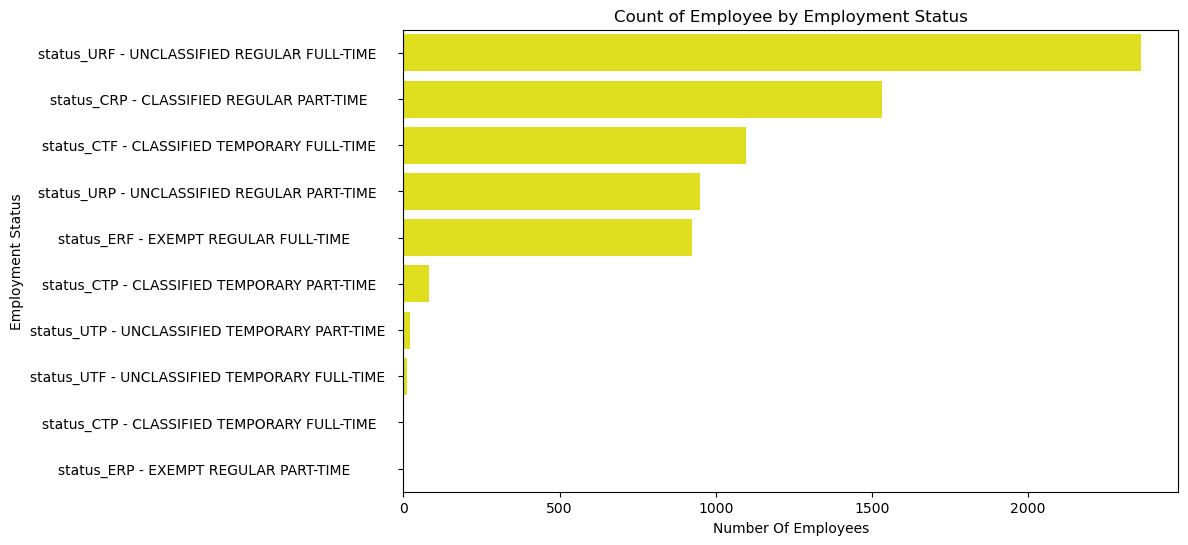

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.values, y=status_counts.index,color='yellow')
plt.title('Count of Employee by Employment Status')
plt.xlabel('Number Of Employees')
plt.ylabel('Employment Status')
plt.show()

### Monthly Vs Annual Salary Consistancy Check

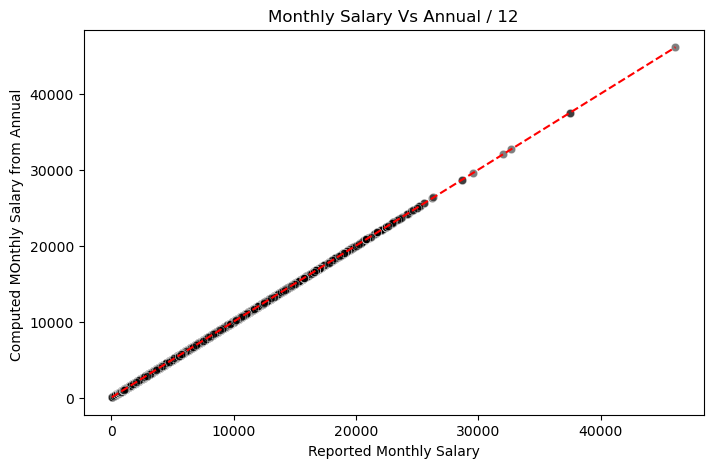

In [66]:
data['monthly from annual']=data['annual']/12
plt.figure(figsize=(8,5))
sns.scatterplot(x='monthly',y='monthly from annual',data=data, alpha=0.5,color='black')
plt.plot([data['monthly'].min(),data["monthly"].max()],
          [data['monthly'].min(),data['monthly'].max()],color='red',linestyle='--')
plt.title('Monthly Salary Vs Annual / 12')
plt.xlabel('Reported Monthly Salary')
plt.ylabel('Computed MOnthly Salary from Annual ')
plt.show()

### Top Agencies With Heighest Average Salaries

In [68]:
average_salaries_by_agencies = data.groupby('agency_name')['annual'].mean().nlargest(10)

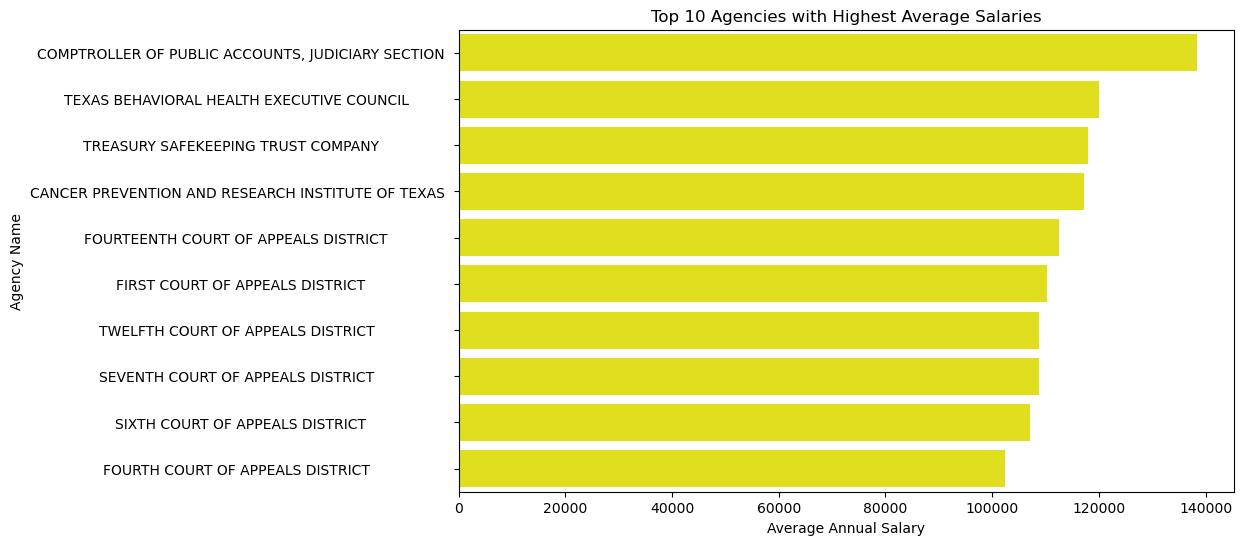

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salaries_by_agencies.values, y=average_salaries_by_agencies.index,color='yellow')
plt.title('Top 10 Agencies with Highest Average Salaries')
plt.xlabel('Average Annual Salary')
plt.ylabel('Agency Name')
plt.show()

### Distribution of year of Service

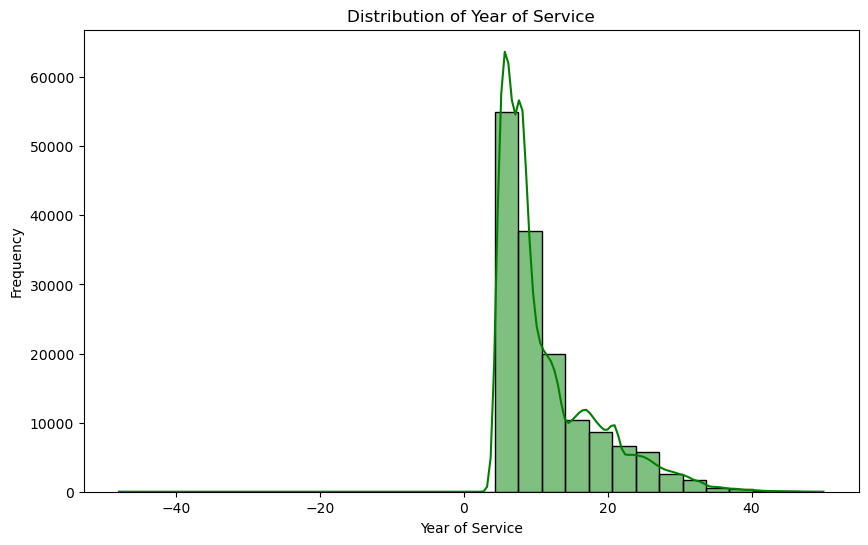

In [71]:
plt.figure(figsize=(10,6))
sns.histplot(data['year_of_service'],bins=30,kde=True,color='green')
plt.title('Distribution of Year of Service')
plt.xlabel('Year of Service')
plt.ylabel('Frequency')
plt.show()

### Salary Distribution By Job Title

In [73]:
top_titels=data['class_title'].value_counts().nlargest(10).index
data_top_titles=data[data['class_title'].isin(top_titels)]

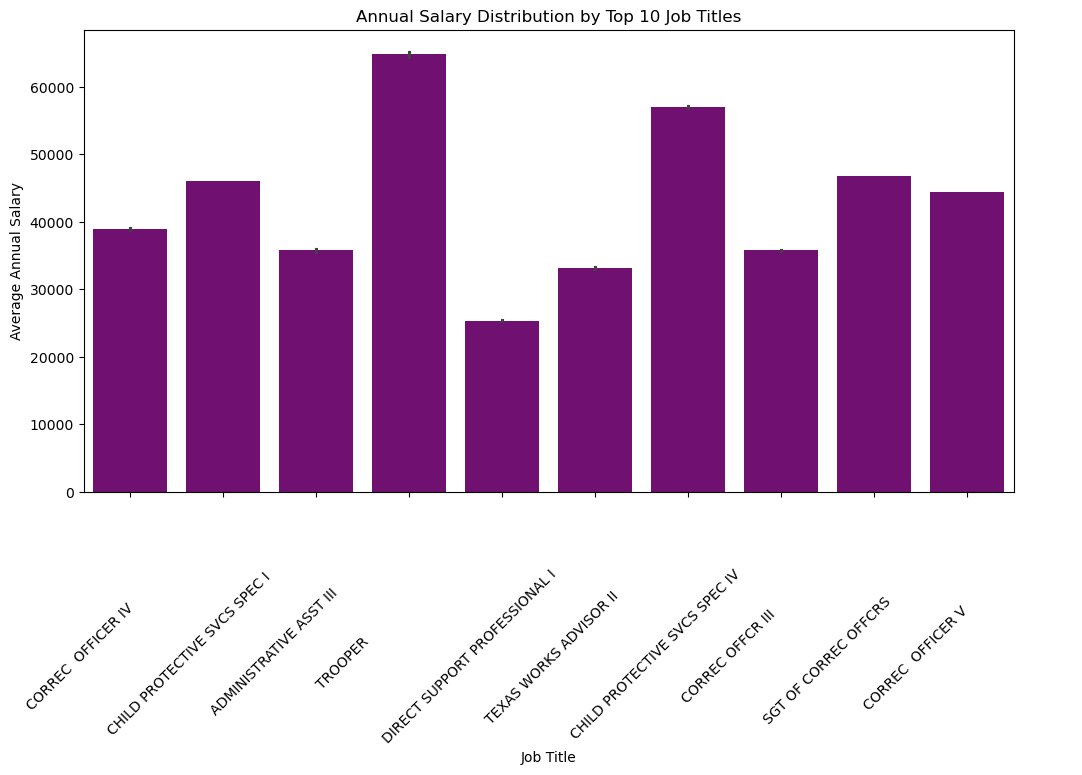

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(data=data_top_titles,x='class_title',y='annual',color='purple')
plt.xticks(rotation=45)
plt.title('Annual Salary Distribution by Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Annual Salary')
plt.show()

### Cross Tab of Employment Status VS Gender

In [76]:
status_cols=[col for col in data.columns if col.startswith('status_')]
gender_status=data.groupby('gender')[status_cols].sum().T

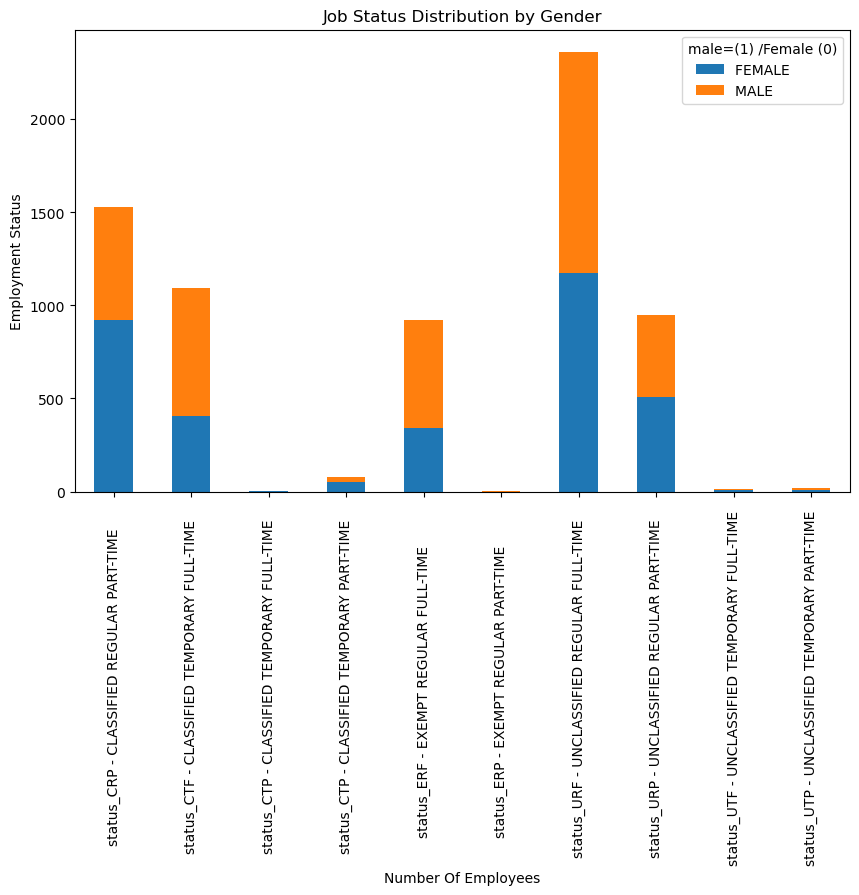

In [77]:
gender_status.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Job Status Distribution by Gender')
plt.xlabel('Number Of Employees')
plt.ylabel('Employment Status')
plt.legend(title='male=(1) /Female (0)')
plt.show()

### Pairplot Of Key Features

In [79]:
#Select A few relevant numerical Features
pairplot_features=['annual','hrs_per_wk','hrly_rate','year_of_service']

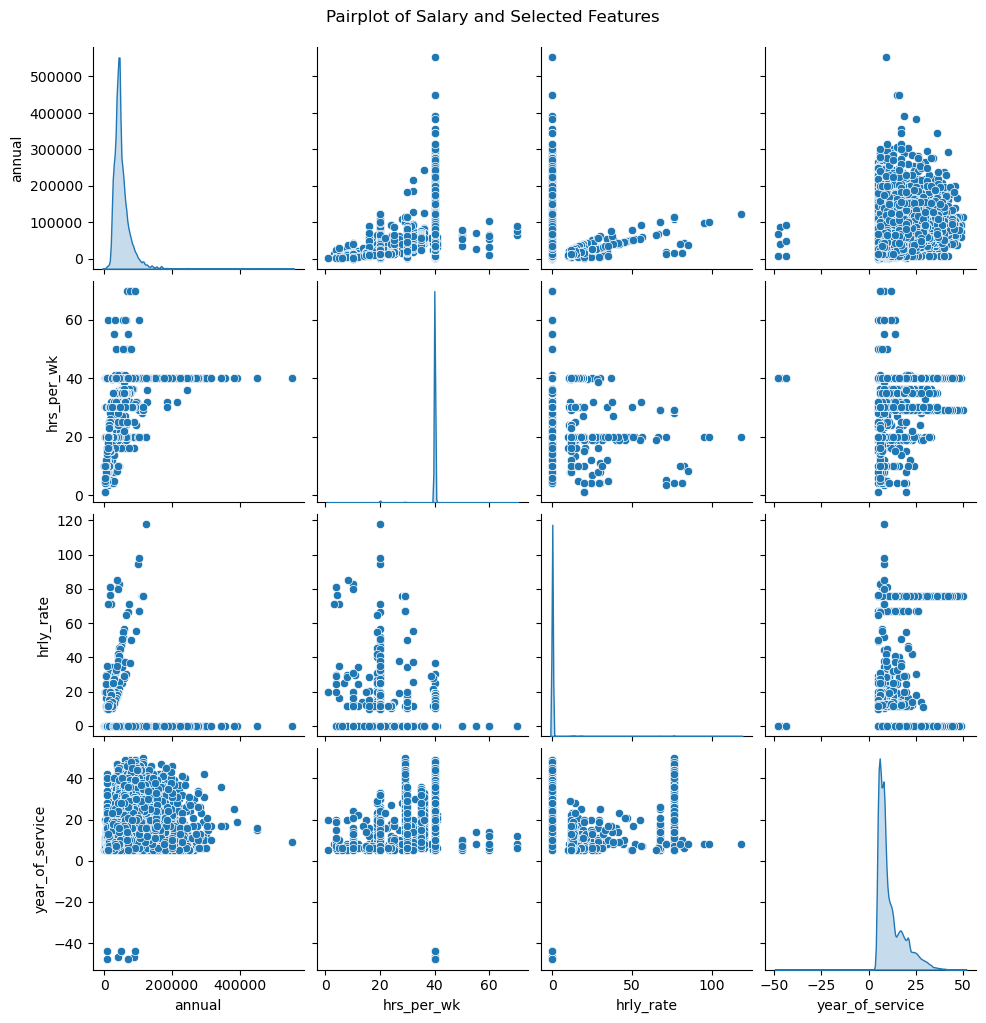

In [80]:
#create Pairplot
sns.pairplot(data[pairplot_features],diag_kind='kde')
plt.suptitle('Pairplot of Salary and Selected Features',y=1.02)
plt.show()

### Salary Trend By Employement Type

In [82]:
status_avg =data[status_cols +['annual']].copy()
status_melted = status_avg.melt(id_vars='annual',var_name='employment status',value_name='present')
statsu_melted =status_melted[status_melted['present']==1]

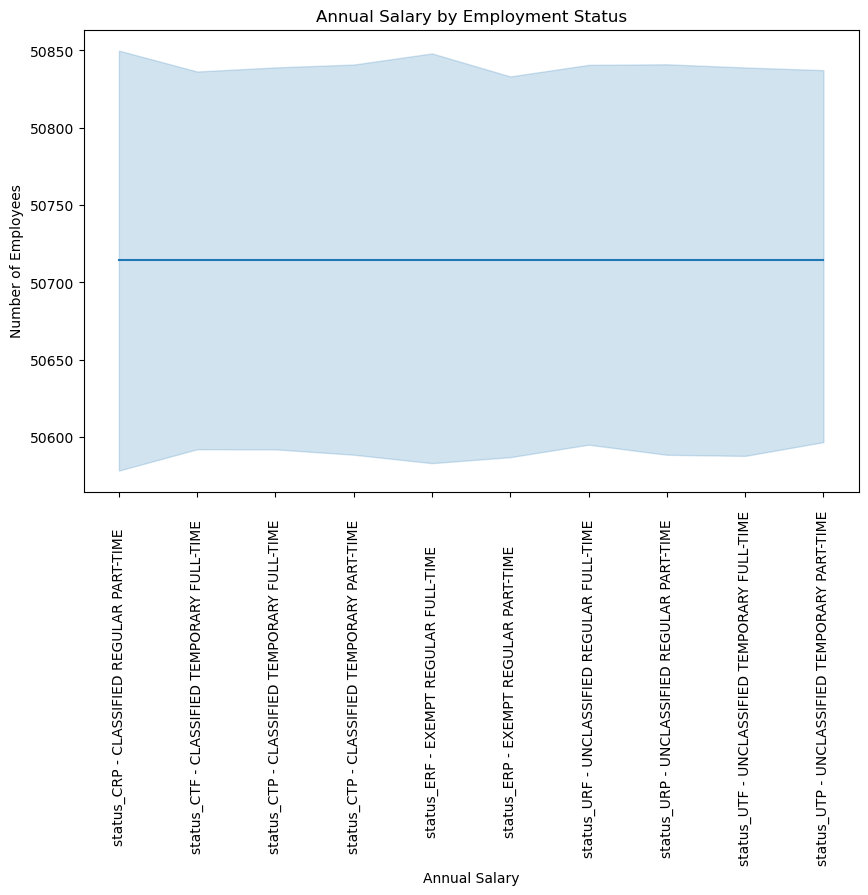

In [83]:
plt.figure(figsize=(10,6))
sns.lineplot(data=status_melted,x='employment status',y='annual')
plt.xticks(rotation=90)
plt.title('Annual Salary by Employment Status')
plt.xlabel('Annual Salary')
plt.ylabel('Number of Employees')
plt.show()

### Model Building

### Feature Selection

In [86]:
#Define Target and drop irrelavant columns
target = 'annual'
drop_cols=['annual','first_name','last_name','mi','state_number','employ_date']

In [87]:
x=data.drop(columns = drop_cols)
y=data[target]

### Train-Test-Split

In [89]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Model Selection

### Linear Regression

In [92]:
#Drop all Object (STRING) Columns
x_train=x_train.select_dtypes(include=[np.number])
x_test=x_test.select_dtypes(include=[np.number])

In [93]:
#Initialize Model
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [94]:
#predict
y_pred_lr=lr_model.predict(x_test)

In [95]:
#Evaluate
mae_lr=mean_absolute_error(y_test,y_pred_lr)
mse_lr=mean_squared_error(y_test,y_pred_lr)
rmse_lr=np.sqrt(mse_lr)
r2_lr=r2_score(y_test,y_pred_lr)

In [96]:
print("Linear Regression Metrics:")
print(f"Mean Absolute Error: {mae_lr:.3f}")
print(f"Mean Squared Error: {mse_lr:.3f}")
print(f"Root Mean Squared Error: {rmse_lr:.4f}")
print(f"R-squared: {r2_score(y_test,y_pred_lr):.4f}")

Linear Regression Metrics:
Mean Absolute Error: 0.000
Mean Squared Error: 0.000
Root Mean Squared Error: 0.0000
R-squared: 1.0000


### Decision Tree Regressor

In [98]:
#Initialize Model
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [99]:
#predict on test set
y_pred_dt=dt_model.predict(x_test)

In [100]:
#Evaluate the Model
mae_dt=mean_absolute_error(y_test,y_pred_dt)
mse_dt=mean_squared_error(y_test,y_pred_dt)
rmse_dt=np.sqrt(mse_dt)
r2_dt=r2_score(y_test,y_pred_dt)

In [101]:
#Print Results
print("Decision Tree Regressor Metrics:")
print(f"Mean Absolute Error: {mae_dt:.3f}")
print(f"Mean Squared Error: {mse_dt:.3f}")
print(f"Root Mean Squared Error: {rmse_dt:.3f}")
print(f"R-squared: {r2_dt:.4f}")

Decision Tree Regressor Metrics:
Mean Absolute Error: 5.301
Mean Squared Error: 363081.652
Root Mean Squared Error: 602.563
R-squared: 0.9994


### Random Forest Regressor

In [103]:
#Initialize the Model
rf_model=RandomForestRegressor(random_state=42,n_estimators=100)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [104]:
#Predict on Test data
y_pred_rf=rf_model.predict(x_test)

In [105]:
#Evaluate the Model
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
r2_rf=r2_score(y_test,y_pred_rf)

In [106]:
#Print Results
print("Random Forest Regressor Metrics:")
print(f"Mean Absolute Error: {mae_rf:.3f}")
print(f"Mean Squared Error: {mse_rf:.3f}")
print(f"Root Mean Squared Error: {rmse_rf:.3f}")

Random Forest Regressor Metrics:
Mean Absolute Error: 7.785
Mean Squared Error: 613133.617
Root Mean Squared Error: 783.028


### XGBoost Regressor

In [108]:
#Initialize the Model
xgb_model=XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=100)
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [109]:
#predict on test Data
y_pred_xgb=xgb_model.predict(x_test)

In [110]:
#Evaluate the Model
mae_xgb=mean_absolute_error(y_test,y_pred_xgb)
mse_xgb=mean_squared_error(y_test,y_pred_xgb)
rmse_xgb=np.sqrt(mse_xgb)
r2_xgb=r2_score(y_test,y_pred_xgb)

In [111]:
#Print Results
print("XGBoost Regressor Metrics:")
print(f"Mean Absolute Error: {mae_xgb:.3f}")
print(f"Mean Squared Error: {mse_xgb:.3f}")
print(f"Root Mean Squared Error: {rmse_xgb:.3f}")
print(f"R-squared: {r2_xgb:.4f}")

XGBoost Regressor Metrics:
Mean Absolute Error: 239.965
Mean Squared Error: 4758638.957
Root Mean Squared Error: 2181.430
R-squared: 0.9926


### Support Vector Regressor

In [113]:
# Scale the feature (Important for SVM)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [114]:
x_train_scaled.shape

(119584, 6)

In [115]:
#Initialize the Model
svm_model=SVR(kernel='rbf',C=1,gamma='scale',epsilon=0.1)
svm_model.fit(x_train_scaled,y_train)

SVR(C=1)

In [116]:
#predict on the data
y_pred_svm=svm_model.predict(x_test_scaled)

In [117]:
#Evaluate the model
mae_svm=mean_absolute_error(y_test,y_pred_svm)
mse_svm=mean_squared_error(y_test,y_pred_svm)
rmse_svm=np.sqrt(mse_svm)
r2_svm=r2_score(y_test,y_pred_svm)

In [118]:
# Print the Results
print("Support Vector Regressor Metrics:")
print(f"Mean Absolute Error: {mae_svm:.3f}")
print(f"Mean Squared Error: {mse_svm:.3f}")
print(f"Root Mean Squared Error: {rmse_svm:.3f}")
print(f"R-squared: {r2_svm:.4f}")

Support Vector Regressor Metrics:
Mean Absolute Error: 8640.913
Mean Squared Error: 419320349.070
Root Mean Squared Error: 20477.313
R-squared: 0.3472


### Compare Model Performace

In [120]:
#Linear Regression
mae_lr=mean_absolute_error(y_test,y_pred_lr)
mse_lr=mean_squared_error(y_test,y_pred_lr)
rmse_lr=np.sqrt(mse_lr)
r2_lr=r2_score(y_test,y_pred_lr)

#Decision Tree
mae_dt=mean_absolute_error(y_test,y_pred_dt)
mse_dt=mean_squared_error(y_test,y_pred_dt)
rmse_dt=np.sqrt(mse_dt)
r2_dt=r2_score(y_test,y_pred_dt)

#Random Forest
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
r2_rf=r2_score(y_test,y_pred_rf)

#XGBoost
mae_xgb=mean_absolute_error(y_test,y_pred_xgb)
mse_xgb=mean_squared_error(y_test,y_pred_xgb)
rmse_xgb=np.sqrt(mse_xgb)
r2_xgb=r2_score(y_test,y_pred_xgb)

#SVM
mae_svm=mean_absolute_error(y_test,y_pred_svm)
mse_svm=mean_squared_error(y_test,y_pred_svm)
rmse_svm=np.sqrt(mse_svm)
r2_svm=r2_score(y_test,y_pred_svm)


In [121]:
# Model Performace Summary
model_results=pd.DataFrame({
    'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost','SVM'],
    'MAE':[mae_lr,mae_dt,mae_rf,mae_xgb,mae_svm],
    'MSE':[mse_lr,mse_dt,mse_rf,mse_xgb,mse_svm],
    'RMSE':[rmse_lr,rmse_dt,rmse_rf,rmse_xgb,rmse_svm],
    'R-squared':[r2_lr,r2_dt,r2_rf,r2_xgb,r2_svm]
})

In [122]:
#Sort by RMSE Ascending
model_results.sort_values(by='RMSE',ascending=True)
display(model_results)

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression,6.424543e-11,6.854970e-21,8.279474e-11,1.000000
1,Decision Tree,5.300760e+00,3.630817e+05,6.025626e+02,0.999435
2,Random Forest,7.784505e+00,6.131336e+05,7.830285e+02,0.999045
3,XGBoost,2.399647e+02,4.758639e+06,2.181430e+03,0.992591
4,SVM,8.640913e+03,4.193203e+08,2.047731e+04,0.347160


In [123]:
#Feature Importance
#Assiging Best Model
best_model=xgb_model

In [124]:
#Feature Importance(for Tree-based Models)
importances = best_model.feature_importances_
feature_names = x_train.columns

In [125]:
importance_data = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

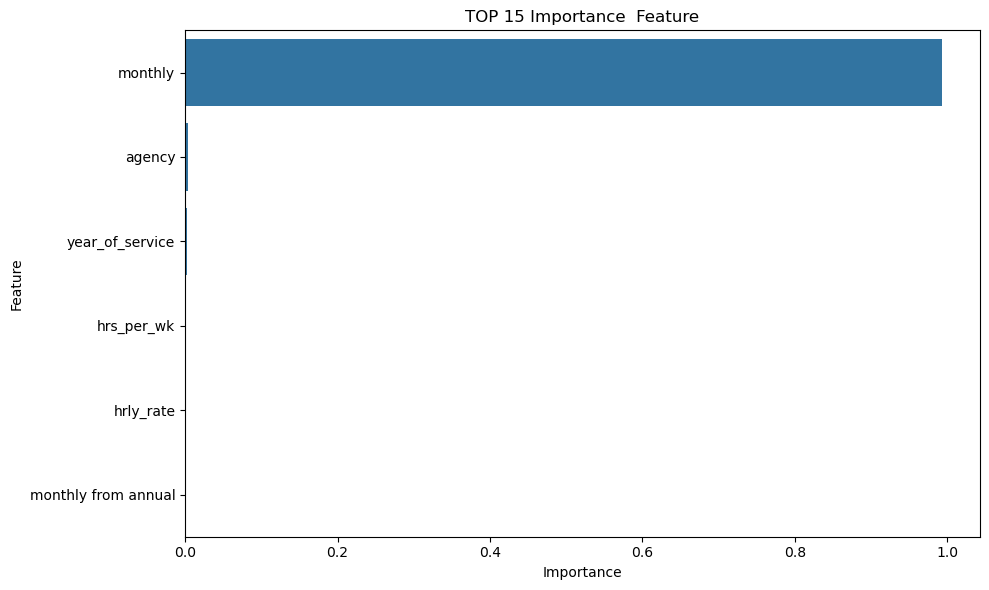

In [126]:
#Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_data.head(15))
plt.title('TOP 15 Importance  Feature')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Hyperparameter Tunning

In [128]:
#Randomized Search
#Define base model
xgb=XGBRegressor(random_state=42)

In [129]:
#Define Parameter Grid
param_grid={
    'n_estimators':[100,300,500],
    'learning_rate':[0.01,0.05,0.1,0.2],
    'max_depth':[3,5,7,10],
    'subsample':[0.6,0.8,1.0],
    'colsample_bytree':[0.6,0.8,1.0],
    'gamma':[0,0.1,0.3]
}

In [130]:
#Initializing RandomizedSearchCV
random_search= RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [147]:
#Fit the Training Data
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [148]:
#Best Parameters
print("Best Parameter:\n",random_search.best_params_)

Best Parameter:
 {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}


In [151]:
#Evaluate the best Model
best_xgb =random_search.best_estimator_
y_pred_best =best_xgb.predict(x_test)

In [153]:
mae = mean_absolute_error(y_test,y_pred_best)
rmse = mean_squared_error(y_test,y_pred_best)
r2 =r2_score(y_test,y_pred_best)

In [155]:
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: 280.873
Root Mean Squared Error: 4892046.609
R-squared: 0.9924


### Grid Search

In [158]:
#Define the Model
rf = RandomForestRegressor(random_state=42)

In [160]:
#Define The Hyperparameter grid
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

In [162]:
#Setup the GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [165]:
##Best Parameters
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [166]:
#Best Parameters
print("Best Parameters Found by Grid Search:\n",grid_search.best_params_)

Best Parameters Found by Grid Search:
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [169]:
#Best Model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)

In [171]:
rmse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [173]:
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R-squared: {r2:.4f}")

Root Mean Squared Error: 1664601.939
R-squared: 0.9974


### Conclusion

# Texas Salary Prediction Using Machine Learning
**Projct Goal:** The project aimed to predict employee annual salaries using various machine learning techniques based on attributes like job title,abs
                agency, employment status, years of service, and demographic factors.
                
**Models Evaluated:** Five different machine learning models were built and evaluated:
                        Linear Regression, Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor, and Support Vector Regressor.
                        
**Key Finding:** The XGBoost Regressor consistently outperformed the other models across all key evaluation metrics.

**Performance Metrics:** XGBoost achieved the
Lowest Mean Absolute Error (MAE),
Lowest Root Mean Squared Error (RMSE),
Highest R² Score (explained variance).

**Implication:** This suggests that XGBoost was most effective at identifying complex, 
                non-linear relationships within the dataset and demonstrating good generalization on unseen data.